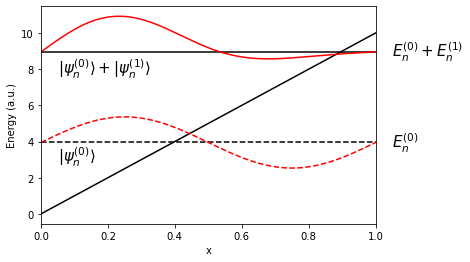

In [151]:
import numpy as np
import matplotlib.pyplot as plt

L=1 #Length
n=2
mass=5
b=10

nstates=n+20
C = [0]*nstates
x = np.linspace(0,L,1000)

def wave(a,L,x):
    y = np.sqrt(2/L)*np.sin((a*np.pi/L) * x) 
    return (y)

def pwave(n,L,nstates,C,x):
    y = 0
    for k in range(0, nstates):
        y = y + C[k]*wave(k+1,L,x)
    return (y)

def energy(n,L,mass):
    y = (np.pi**2*n**2)/(2*mass*L**2)
    return (y)

def foe(b,L):
    y = b*L/2
    return (y)

def coefficient(b,L,n,m):
    if n==m:
        y = b*L/2
    else:
        y = (2*b*L/np.pi**2)*(((-1)**((n+m-1)/2))/(n+m)**2-((-1)**((n-m-1)/2))/(n-m)**2)
#        y = (2*b*L/np.pi**2)*(1/(n+m)**2-1/(n-m)**2)
    return(y)

for k in range(0, nstates):
    if k+1==n:
        C[k] = 1
    elif np.mod(k+1+n,2)==0:
        C[k] = 0
    else:
#        C[k] = coefficient(b,L,k+1,n)
        C[k] = coefficient(b,L,k+1,n)*((2*mass*L**2)/(np.pi**2*(n**2-(k+1)**2)))
#        C[k] = coefficient(b,L,k+1,n)/(energy(n,L,mass)-energy(k+1,L,mass))
                 
C = C/np.linalg.norm(C)        

fig, ax = plt.subplots()
ax.set(xlim=[0, L], xlabel='x', ylabel='Energy (a.u.)')
ax.plot(x,b*x,'k')
ax.plot([0,L],[energy(n,L,mass),energy(n,L,mass)],'k--')
ax.plot([0,L],[energy(n,L,mass)+foe(b,L),energy(n,L,mass)+foe(b,L)],'k')
ax.plot(x,energy(n,L,mass)+wave(n,L,x),'r--')
ax.plot(x,energy(n,L,mass)+foe(b,L)+pwave(n,L,nstates,C,x),'r')
plt.text(L+0.05*L, energy(n,L,mass), '$E^{(0)}_{n}$', fontsize = 15, horizontalalignment='left', verticalalignment='center')
plt.text(L+0.05*L, energy(n,L,mass)+foe(b,L), '$E^{(0)}_{n}+E^{(1)}_{n}$', fontsize = 15, horizontalalignment='left', verticalalignment='center')
plt.text(0.05*L, 0.8*energy(n,L,mass), r'$\vert\psi^{(0)}_{n}\rangle$', fontsize = 15, horizontalalignment='left', verticalalignment='center')
plt.text(0.05*L, 0.9*(energy(n,L,mass)+foe(b,L)), r'$\vert\psi^{(0)}_{n}\rangle + \vert\psi^{(1)}_{n}\rangle$', fontsize = 15, horizontalalignment='left', verticalalignment='center');